In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score


# CSV from my public URL for convenience
file_url = 'https://drive.google.com/uc?export=download&id=16kpkYFVjOIDvArxpQOZu6iyHXXnRmASc'
df = pd.read_csv(file_url)

# Head function first 5 rows of all columns altogether
print(df.head())


         unix                 date   symbol      open      high       low  \
0  1609459140  2020-12-31 23:59:00  BTC/USD  28982.44  29024.59  28969.83   
1  1609459080  2020-12-31 23:58:00  BTC/USD  29044.79  29048.62  29000.12   
2  1609459020  2020-12-31 23:57:00  BTC/USD  29039.53  29048.63  29023.26   
3  1609458960  2020-12-31 23:56:00  BTC/USD  29052.02  29059.42  29039.28   
4  1609458900  2020-12-31 23:55:00  BTC/USD  29036.10  29052.02  29025.78   

      close  Volume BTC     Volume USD  
0  28992.79    5.897679  170990.182941  
1  29000.12   20.362289  590508.837815  
2  29044.79   14.503728  421257.721488  
3  29039.53    2.707583   78626.925850  
4  29052.02    7.631439  221708.705383  


In [56]:
print("Shape :")
print(df.shape)

Shape :
(486660, 17)


In [60]:
print(df.describe)


<bound method NDFrame.describe of                       date      open      high       low     close  \
29     2020-12-31 23:30:00  29059.81  29059.81  28964.26  28998.23   
30     2020-12-31 23:29:00  29048.31  29064.76  29037.87  29062.81   
31     2020-12-31 23:28:00  29019.70  29049.38  29012.62  29037.79   
32     2020-12-31 23:27:00  29021.18  29037.89  29001.47  29019.70   
33     2020-12-31 23:26:00  29065.36  29065.39  29000.00  29042.59   
...                    ...       ...       ...       ...       ...   
487717 2020-01-01 00:05:00   7156.52   7159.51   7150.10   7158.50   
487718 2020-01-01 00:04:00   7158.50   7158.50   7154.97   7157.20   
487719 2020-01-01 00:03:00   7158.82   7158.82   7156.90   7156.90   
487720 2020-01-01 00:02:00   7158.82   7158.82   7158.82   7158.82   
487721 2020-01-01 00:01:00   7161.51   7161.51   7155.09   7161.20   

        Volume BTC     Volume USD  Volume BTC Log  Volume USD Log      MA_10  \
29       30.561439  886227.647982        3.45

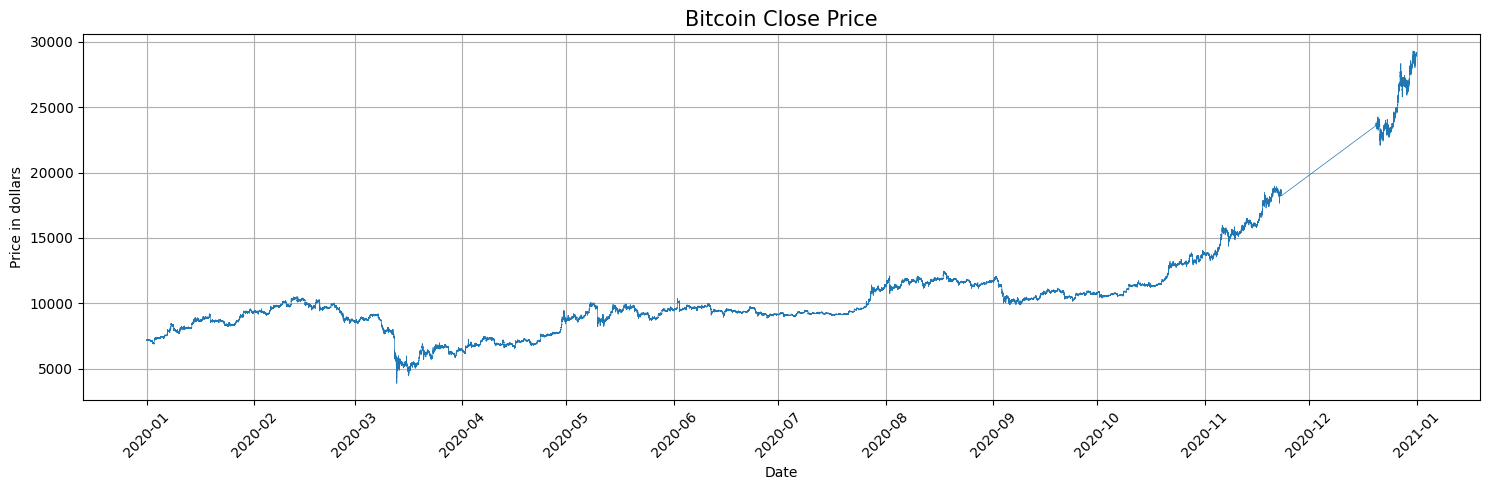

In [41]:
# Convert 'unix' to datetime and create a 'date' column
df['date'] = pd.to_datetime(df['unix'], unit='s')

# Plotting the entire dataset closing price
plt.figure(figsize=(15, 5))
plt.plot(df['date'], df['close'], linewidth=0.5)  # Reduced line width for better visualization with large data

plt.title('Bitcoin Close Price', fontsize=15)
plt.xlabel('Date')
plt.ylabel('Price in dollars')

# Format the x-axis to show every month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Show every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45)  # Rotate x-axis labels to prevent overlap
plt.grid(True)  # Add grid lines for better readability
plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels
plt.show()


In [42]:
# Droping unix & Symbol columns
df = df.drop(columns=['unix', 'symbol'])

# Head function first 5 rows of all columns altogether (afer columns drop)
print(df.head())

                 date      open      high       low     close  Volume BTC  \
0 2020-12-31 23:59:00  28982.44  29024.59  28969.83  28992.79    5.897679   
1 2020-12-31 23:58:00  29044.79  29048.62  29000.12  29000.12   20.362289   
2 2020-12-31 23:57:00  29039.53  29048.63  29023.26  29044.79   14.503728   
3 2020-12-31 23:56:00  29052.02  29059.42  29039.28  29039.53    2.707583   
4 2020-12-31 23:55:00  29036.10  29052.02  29025.78  29052.02    7.631439   

      Volume USD  
0  170990.182941  
1  590508.837815  
2  421257.721488  
3   78626.925850  
4  221708.705383  


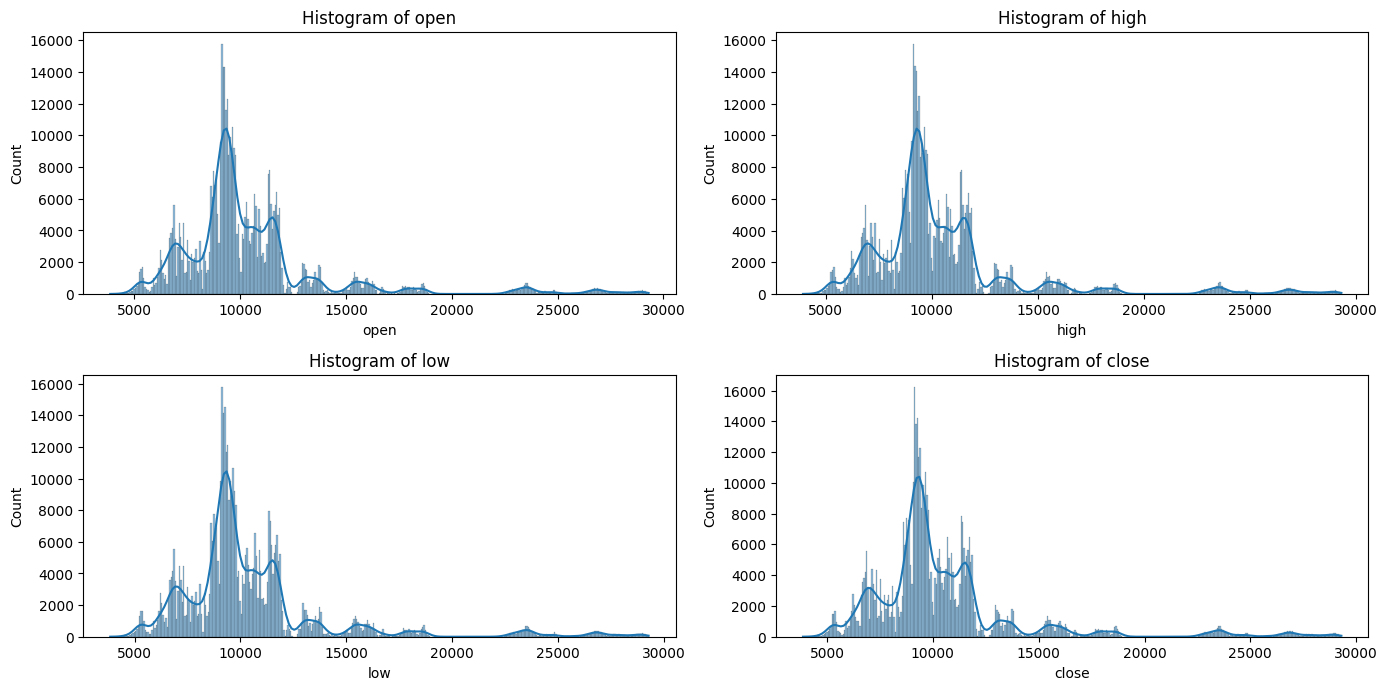

In [43]:
features = ['open', 'high', 'low', 'close']
plt.figure(figsize=(14, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()


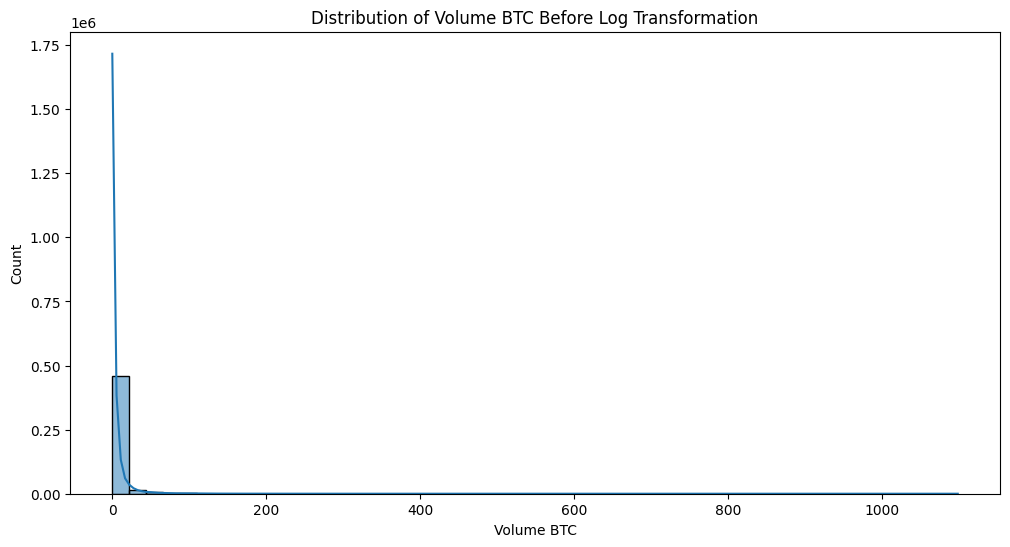

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Volume BTC'], bins=50, kde=True)
plt.title('Distribution of Volume BTC Before Log Transformation')
plt.show()


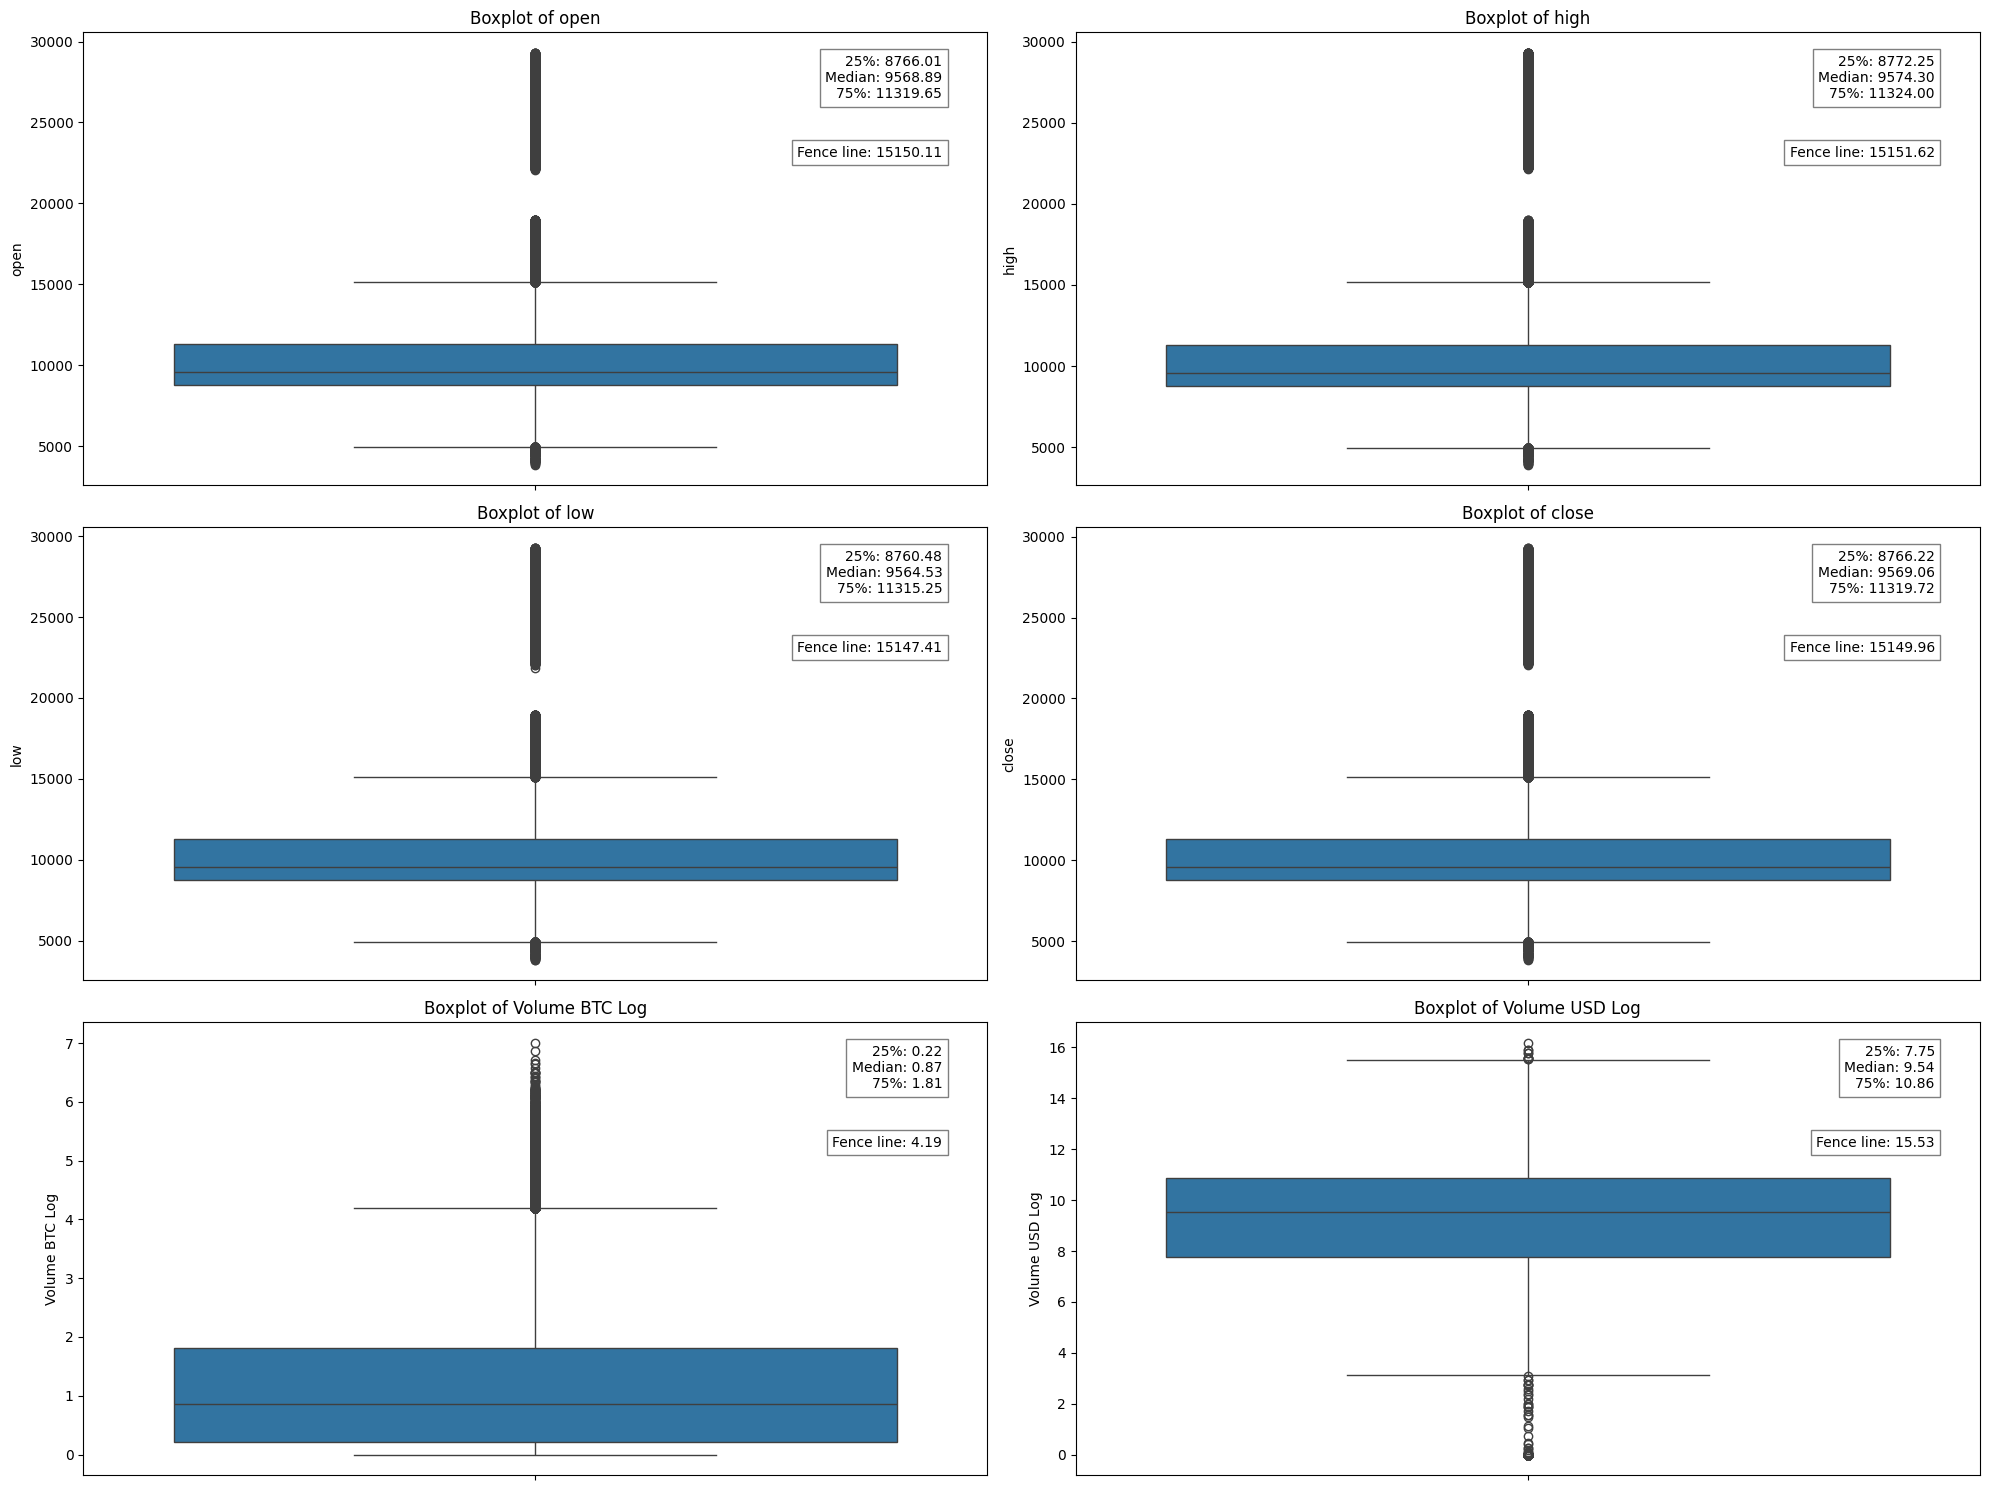

In [44]:
# Applying log transformation
df['Volume BTC Log'] = np.log1p(df['Volume BTC'])
df['Volume USD Log'] = np.log1p(df['Volume USD'])

# Define the features for the boxplot / (excluding plain Volume BTC and Volume USD)
initial_features = ['open', 'high', 'low', 'close', 'Volume BTC Log', 'Volume USD Log']

# Box plots for each feature with annotations
plt.figure(figsize=(20, 15))
for i, feature in enumerate(initial_features):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(df[feature])
    plt.title(f'Boxplot of {feature}')

    # calculating the quartiles & interquartile range
    q1, median, q3 = df[feature].quantile([0.25, 0.5, 0.75])
    IQR = q3 - q1
    k = 1.5  # [Adjastable]
    lower_fence = q1 - k * IQR
    upper_fence = q3 + k * IQR

    # Annotate the plot with the labels
    label_text = f"25%: {q1:.2f}\nMedian: {median:.2f}\n75%: {q3:.2f}"
    plt.text(0.95, 0.95, label_text, horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

    label_fence = f"Fence line: {upper_fence:.2f}"
    plt.text(0.95, 0.75, label_fence, horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()


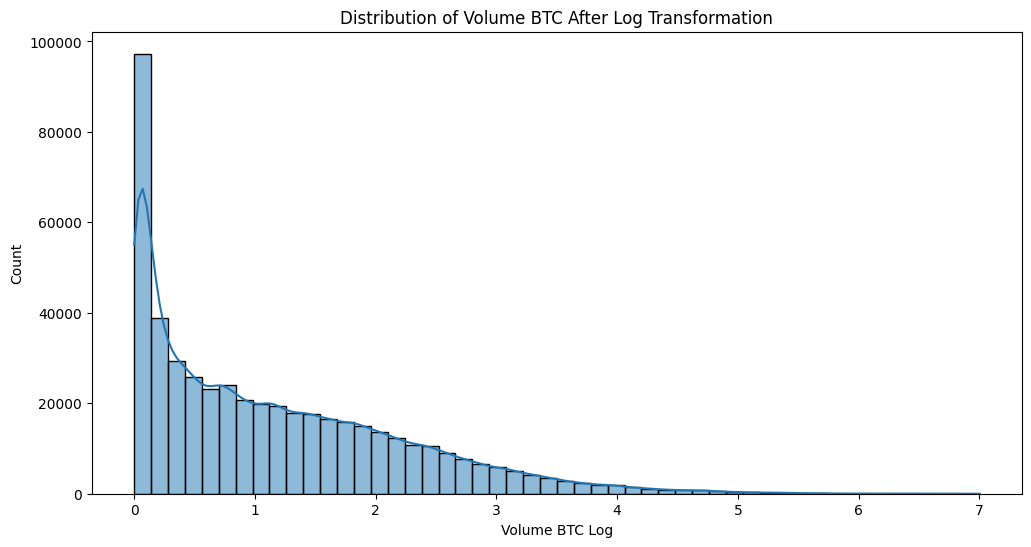

In [61]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Volume BTC Log'], bins=50, kde=True)
plt.title('Distribution of Volume BTC After Log Transformation')
plt.show()


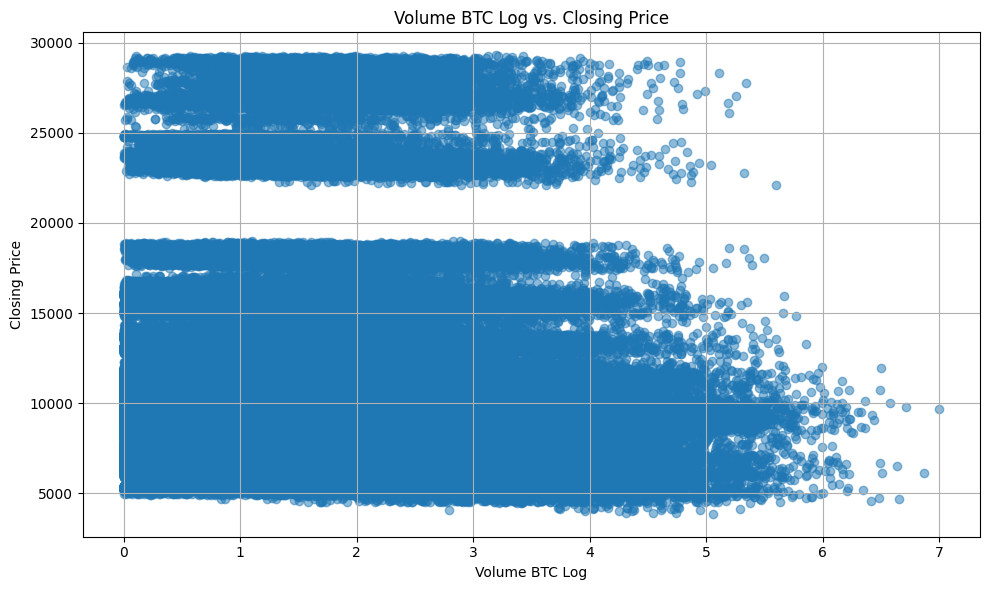

In [45]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Volume BTC Log'], df['close'], alpha=0.5)
plt.title('Volume BTC Log vs. Closing Price')
plt.xlabel('Volume BTC Log')
plt.ylabel('Closing Price')
plt.grid(True)
plt.tight_layout()
plt.show()


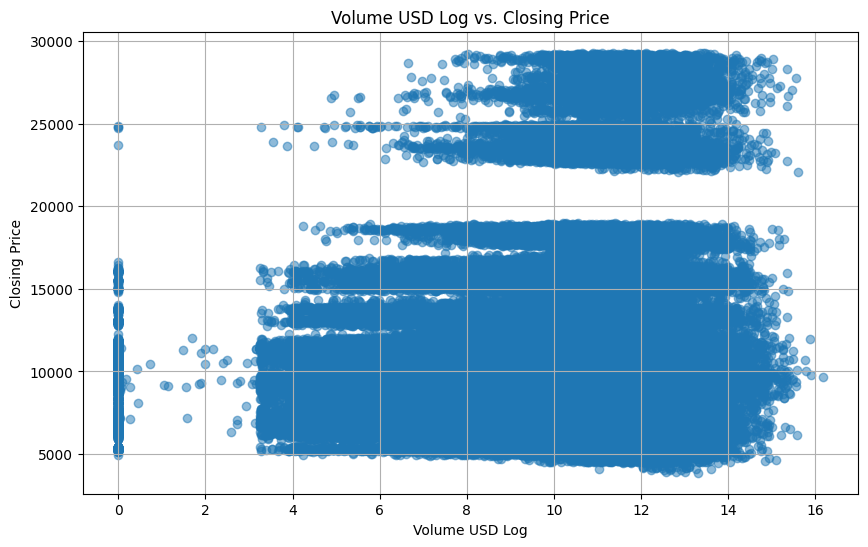

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Volume USD Log'], df['close'], alpha=0.5)
plt.title('Volume USD Log vs. Closing Price')
plt.xlabel('Volume USD Log')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()


In [47]:
# Derived features df['MA_10'] = df['close'].rolling(window=10).mean() df['MA_30'] = df['close'].rolling(window=30).mean() df['Daily Retur# Derived features
df['MA_10'] = df['close'].rolling(window=10).mean()
df['MA_30'] = df['close'].rolling(window=30).mean()
df['Daily Return'] = df['close'].pct_change()
df['High-Low Spread'] = df['high'] - df['low']
df['Volume Change'] = df['Volume BTC'].pct_change()
df['Volume Close Ratio'] = df['Volume BTC'] / df['close']
df['Volatility_10'] = df['close'].rolling(window=10).std()
df['Volatility_30'] = df['close'].rolling(window=30).std()
df.dropna(inplace=True)

# Create a new list of features including the derived features and log-transformed volumes
new_features = ['open', 'high', 'low', 'close', 'Volume BTC Log', 'Volume USD Log', 'MA_10', 'MA_30', 'Daily Return', 'High-Low Spread', 'Volume Change', 'Volume Close Ratio', 'Volatility_10', 'Volatility_30']


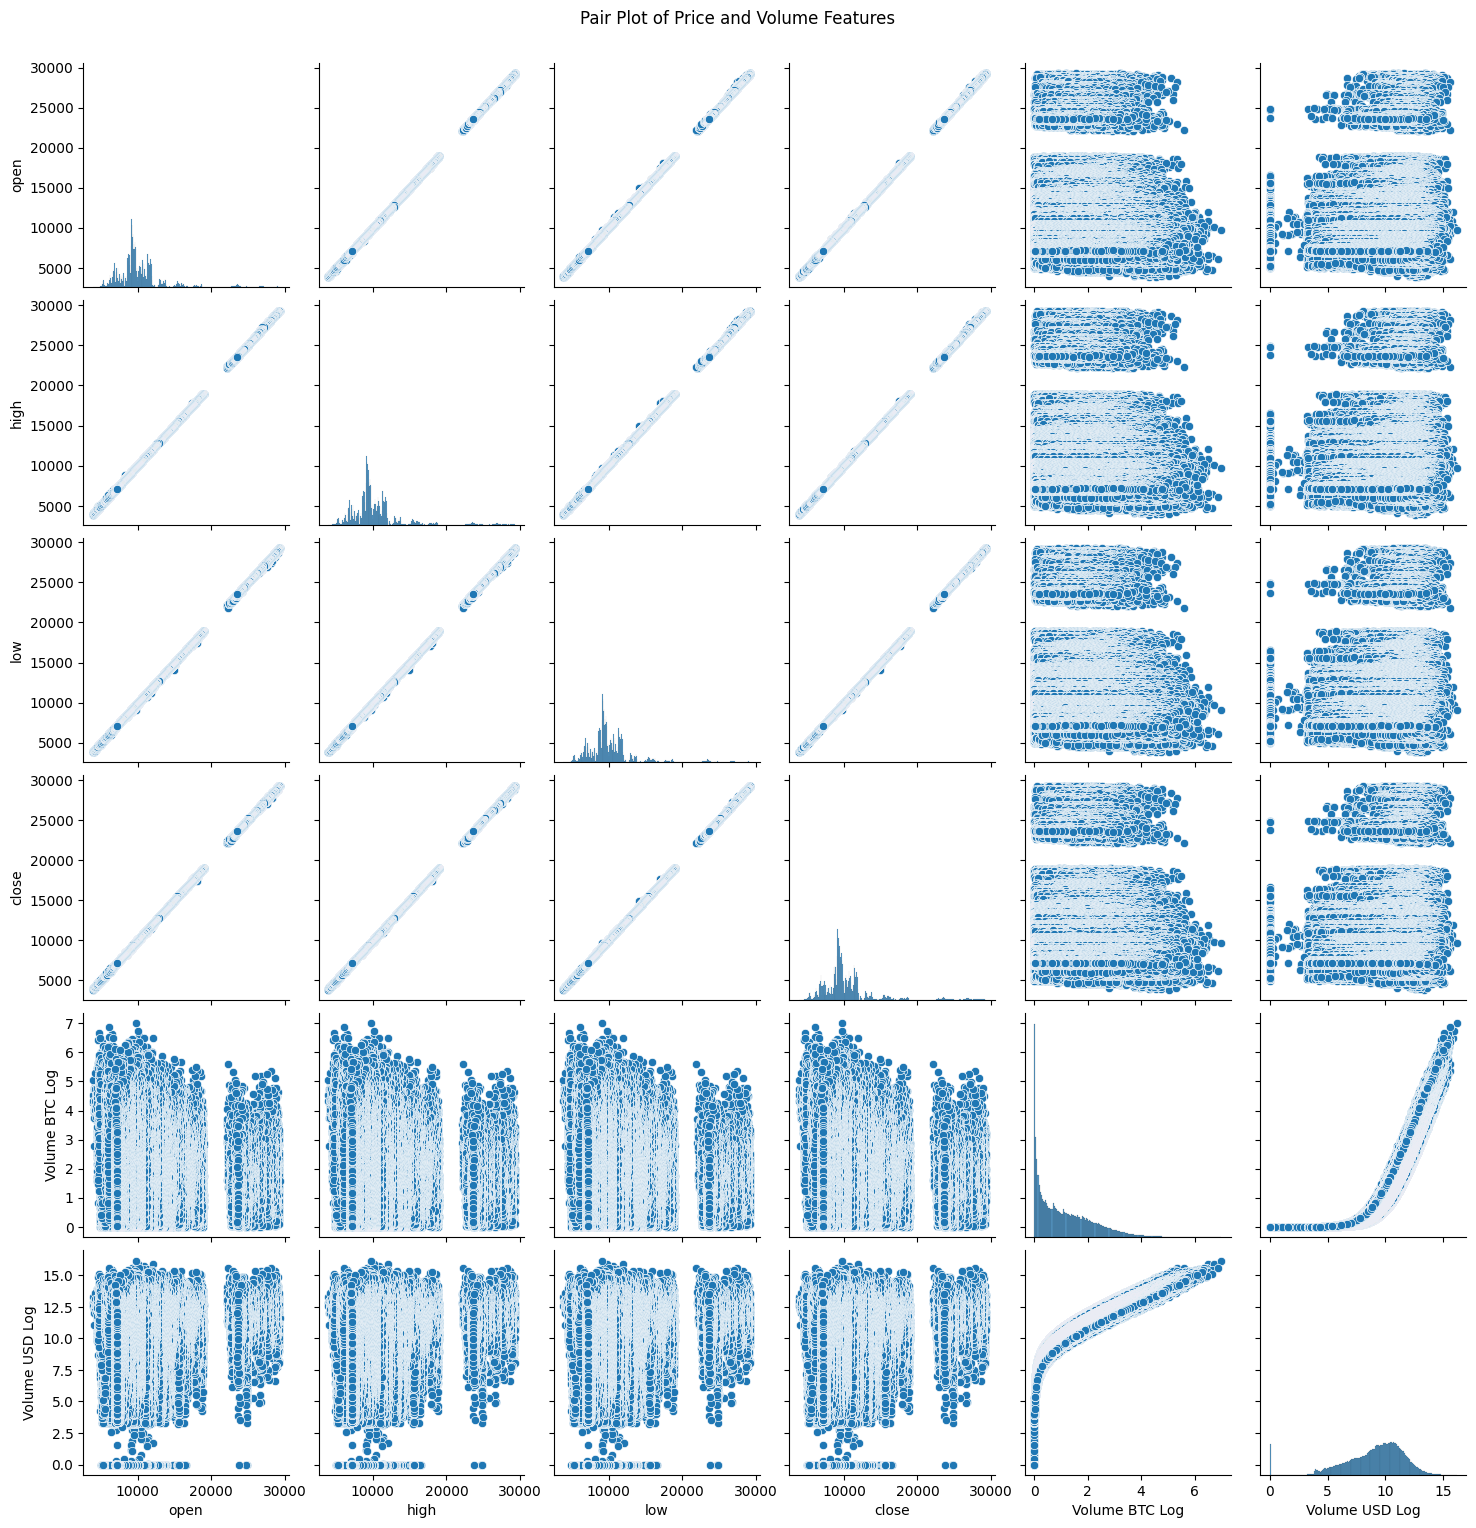

In [48]:
sns.pairplot(df[['open', 'high', 'low', 'close', 'Volume BTC Log', 'Volume USD Log']])
plt.suptitle('Pair Plot of Price and Volume Features', y=1.02)
plt.show()


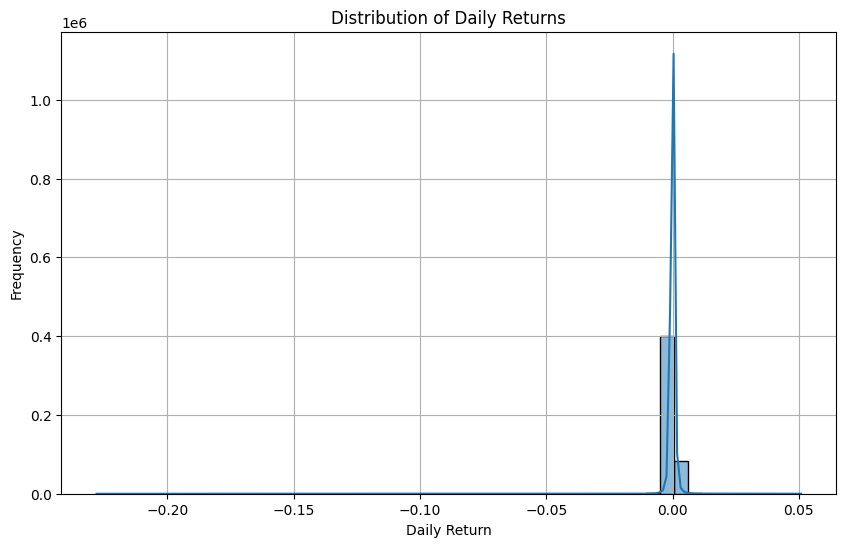

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Daily Return'].dropna(), bins=50, kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


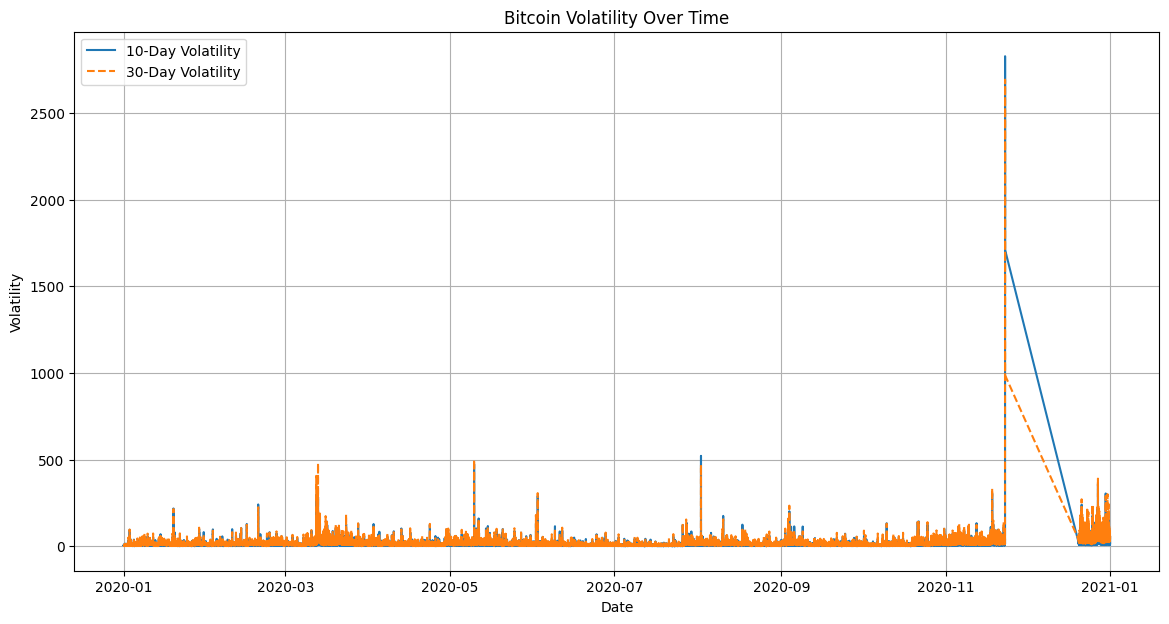

In [50]:
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['Volatility_10'], label='10-Day Volatility')
plt.plot(df['date'], df['Volatility_30'], label='30-Day Volatility', linestyle='--')
plt.title('Bitcoin Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()


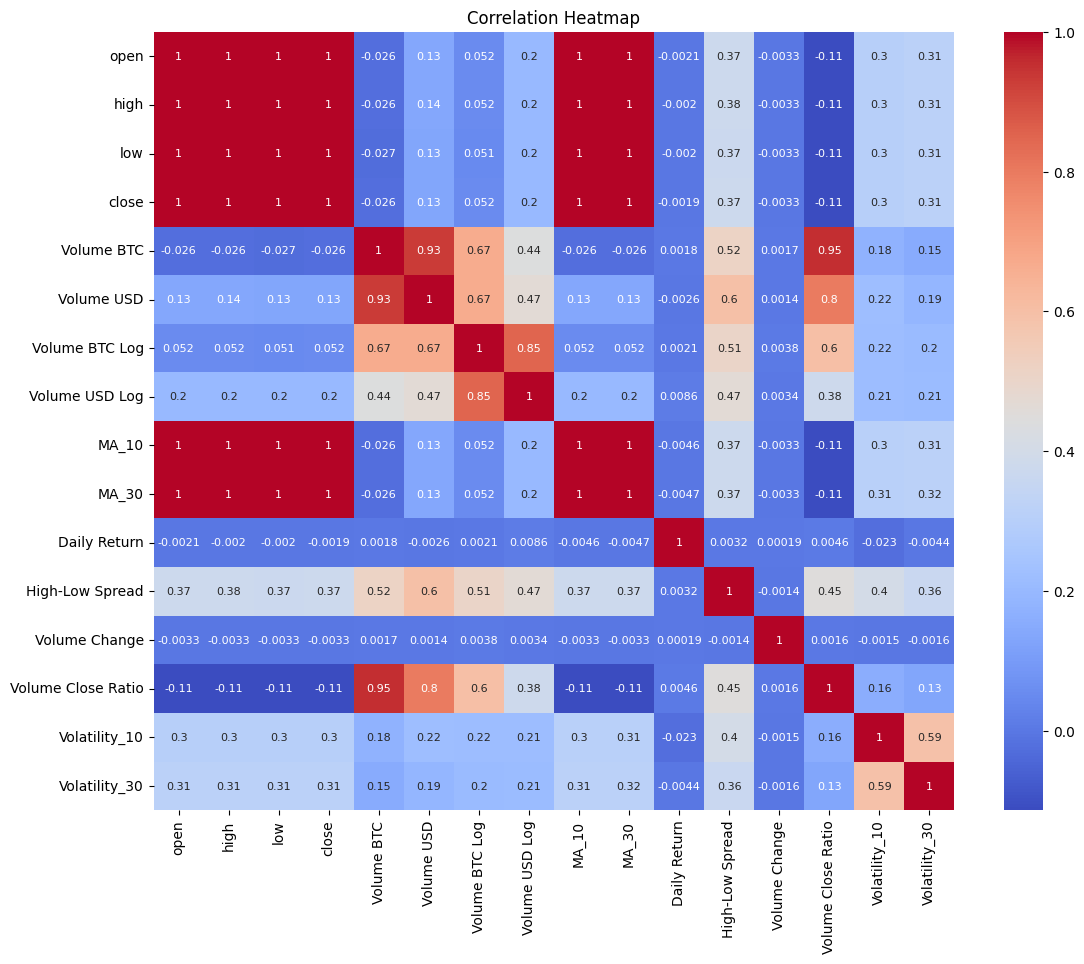

In [51]:
# Drop the 'date' column for correlation matrix calculation
df_numeric = df.drop(columns=['date'])

# Heatmap to check correlations
plt.figure(figsize=(12, 10))
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, annot_kws={"size": 8})
plt.title('Correlation Heatmap')
plt.tight_layout(pad=2.0)
plt.show()


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Spliting & standardize the data
def split_and_standardize(X, y):
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=2022)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_valid = scaler.transform(X_valid)
    return X_train, X_valid, y_train, y_valid

# [Volume Only] Features DataFrame
X_volume_only = df[['Volume BTC Log', 'Volume USD Log']]
y_volume_only = df['close']
X_volume_only_train, X_volume_only_valid, y_volume_only_train, y_volume_only_valid = split_and_standardize(X_volume_only, y_volume_only)

# [Price Only] Features DataFrame
X_price_only = df[['open', 'high', 'low', 'close']]
y_price_only = df['close']
X_price_only_train, X_price_only_valid, y_price_only_train, y_price_only_valid = split_and_standardize(X_price_only, y_price_only)

# [Moving Averages Only] Features DataFrame
X_ma_only = df[['MA_10', 'MA_30']]
y_ma_only = df['close']
X_ma_only_train, X_ma_only_valid, y_ma_only_train, y_ma_only_valid = split_and_standardize(X_ma_only, y_ma_only)

# [Volatility Only] Features DataFrame
X_volatility_only = df[['Volatility_10', 'Volatility_30']]
y_volatility_only = df['close']
X_volatility_only_train, X_volatility_only_valid, y_volatility_only_train, y_volatility_only_valid = split_and_standardize(X_volatility_only, y_volatility_only)

# [Volume Close Ratio with Volume No Log] Features DataFrame
X_close_ratio_with_volume_no_log = df[['Volume Close Ratio', 'Volume BTC', 'Volume USD']]
y_close_ratio_with_volume_no_log = df['close']
X_close_ratio_with_volume_no_log_train, X_close_ratio_with_volume_no_log_valid, y_close_ratio_with_volume_no_log_train, y_close_ratio_with_volume_no_log_valid = split_and_standardize(X_close_ratio_with_volume_no_log, y_close_ratio_with_volume_no_log)

# [Moving Averages with Volatility] Features DataFrame
X_ma_with_volatility = df[['MA_10', 'MA_30', 'Volatility_10', 'Volatility_30']]
y_ma_with_volatility = df['close']
X_ma_with_volatility_train, X_ma_with_volatility_valid, y_ma_with_volatility_train, y_ma_with_volatility_valid = split_and_standardize(X_ma_with_volatility, y_ma_with_volatility)

# [Comprehensive Features] DataFrame
X_comprehensive = df[['open', 'high', 'low', 'close', 'Volume BTC Log', 'Volume USD Log', 'MA_10', 'MA_30', 'Daily Return', 'High-Low Spread', 'Volatility_10', 'Volatility_30']]
y_comprehensive = df['close']
X_comprehensive_train, X_comprehensive_valid, y_comprehensive_train, y_comprehensive_valid = split_and_standardize(X_comprehensive, y_comprehensive)

# Print the shapes of the training and testing sets to confirm the split
print(f"Volume Only Training data shape: X_train: {X_volume_only_train.shape}, y_train: {y_volume_only_train.shape}")
print(f"Price Only Training data shape: X_train: {X_price_only_train.shape}, y_train: {y_price_only_train.shape}")
print(f"Moving Averages Only Training data shape: X_train: {X_ma_only_train.shape}, y_train: {y_ma_only_train.shape}")
print(f"Volatility Only Training data shape: X_train: {X_volatility_only_train.shape}, y_train: {y_volatility_only_train.shape}")
print(f"Volume Close Ratio with Volume No Log Training data shape: X_train: {X_close_ratio_with_volume_no_log_train.shape}, y_train: {y_close_ratio_with_volume_no_log_train.shape}")
print(f"Moving Averages with Volatility Training data shape: X_train: {X_ma_with_volatility_train.shape}, y_train: {y_ma_with_volatility_train.shape}")
print(f"Comprehensive Features Training data shape: X_train: {X_comprehensive_train.shape}, y_train: {y_comprehensive_train.shape}")


Volume Only Training data shape: X_train: (340662, 2), y_train: (340662,)
Price Only Training data shape: X_train: (340662, 4), y_train: (340662,)
Moving Averages Only Training data shape: X_train: (340662, 2), y_train: (340662,)
Volatility Only Training data shape: X_train: (340662, 2), y_train: (340662,)
Volume Close Ratio with Volume No Log Training data shape: X_train: (340662, 3), y_train: (340662,)
Moving Averages with Volatility Training data shape: X_train: (340662, 4), y_train: (340662,)
Comprehensive Features Training data shape: X_train: (340662, 12), y_train: (340662,)
